# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [5]:
NAME = "GIN21"
COLLABORATORS = "Szymon Marczak 405302, Dawid Makowski 407894, Tomasz Sanicki 408056"

---

## Zestaw zadań 8: Analiza danych przestrzennych z wykorzystaniem pakietów GeoPandas i PySAL (część 2)

In [20]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import libpysal as ps
import pointpats as pp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'libpysal'

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [7]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
    
#Teoretyczna funkcja G
    
def g_function_poisson(d, intensity):

    #Wyliczam teoretyczną wartość funkcji G na podstawie wzoru, mając już wcześniej wyliczone unikalne wartości odległości do najbliższego sąsiada
    G = 1 - np.exp(-intensity * np.pi * d**2)
    
    g = pd.DataFrame({'D':d, 'G':G})
    
    g.loc[-1] = [0, 0]  #Dodaję na początek tablicy punkt [0,0]
    g.index = g.index + 1  #Przesuwanie indeksu, żeby nie było -1
    g.sort_index(inplace = True)
    
    return(g)

#Teoretyczna funkcja F

def f_function_poisson(d, intensity):
    
    F = 1 - np.exp(-intensity * np.pi * d**2)
    
    f = pd.DataFrame({'D':d, 'F':F})
    
    f.loc[-1] = [0, 0]  #Dodaję na początek tablicy punkt [0,0]
    f.index = f.index + 1  #Przesuwanie indeksu, żeby nie było -1
    f.sort_index(inplace = True)
    
    return f

#Jednorodny proces Poissona

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    
    x = int(np.random.poisson(intensity * x_lim[1] * y_lim[1])) #generuję proces Poissona o liczbie punktów wg wzoru liczba = intensywność * pole
    tab = np.zeros((x,2)) #tworzę tablicę zer z tą liczbą punktów
    #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
    for i in range(x):
        tab[i,0] += np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        tab[i,1] += np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
    
    df = pd.DataFrame({"X": tab[:,0], "Y": tab[:,1]})
    return df

#Jednorodny proces Poissona wewnątrz poligonu

def homogeneous_poisson_on_polygon(intensity, polygon):
    
    extension = polygon.bounds
    proces = homogeneous_poisson_on_rectangle(intensity, [extension["minx"], extension["maxx"]], [extension["miny"], extension["maxy"]])
    gdf_proces = gpd.GeoDataFrame(geometry = gpd.points_from_xy(proces['X'], proces['Y']))
    gdf_proces = gdf_proces.set_crs('epsg:2180')
    
    return gpd.sjoin(gdf_proces, polygon)

#!pip install libpysal pointpats
#!conda install libpysal pointpats
#raise NotImplementedError()

#### UWAGA!
Znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji.
Z tego powodu wygodniejszym sposobem zdobywania informacji na temat wykorzystywanych modułów, klas i funkcji jest wykorzystanie funkcji help(), np.: help(ps), help(pp), help(pp.pointpattern).

### Zadanie 1: Import i przygotowanie danych (5 pkt)
Wykorzystując funkcję `geopandas.read_file()` zaimportuj do notatnika dane z dołączonych do niego plików (zakres importowanych danych i odwzorowanie kartograficzne nie wymagają zmian). Następnie, wykorzystując funkcję `geopandas.GeoDataFrame.dissolve()` przygotuj tablicę zawierającą geometrię granic całego kraju. Dostosuj informację znajdującą się w kolumnie "Nazwa" stworzonej tablicy do informacji w niej zawartej.

In [22]:
# YOUR CODE HERE

powiaty = gpd.read_file("Powiaty (1).zip") 
p1 = gpd.read_file("points_1.zip") 
p2 = gpd.read_file("points_2.zip") 
p3 = gpd.read_file("points_3.zip") 
p4 = gpd.read_file("points_4.zip") 
p5 = gpd.read_file("points_5.zip") 

powiaty = powiaty.to_crs(2180)
pol = powiaty.dissolve()

#raise NotImplementedError()

### Zadanie 2: Badanie intensywności procesów punktowych metodą szacowania lokalnego  (15 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności rozkładów punktów z plików points_1.zip i points_2.zip na obszarze poszczegolnych powiatów.

Przedstaw wyniki analizy graficznie w postaci kartogramów z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2).

Przydatne klasy, funkcje i własności:
- `geopandas.GeoSeries.within()`
- `geopandas.GeoSeries.area`

#### a) Przygotowanie funkcji

In [47]:
def point_count_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    counts: Series
        Seria Pandas zawierająca liczbą punktów przypisanych do każdego z podobszarów.
    """
    # YOUR CODE HERE
    
    tab = np.zeros(len(subregions)) #Tablica o długości takiej jaka jest liczba powiatów
    
    for i in range (len(subregions)): #Dla każdego powiaty
        #Na GeoSeries points wywołuję metodę .within, która sprawdza dla każdego punktu czy leży w danym powiacie
        a = points.within(subregions.loc[i]["geometry"])
        tab[i] = np.sum(a) #Jako że 'a' to tablica boolean'ów, to po jej zsumowaniu otrzymam liczbę punktów wewnątrz danego powiatu

    return pd.Series(data = tab) #Zwracam serię

    #raise NotImplementedError()

def intensity_on_subregions(points, subregions):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    subregions: GeoDataFrame
        Tablica zawierająca geometrie podobszarów zapisane jako obiekty shapely.geometry.polygon.Polygon.
    Returns
    -------
    intensity: Series
        Seria Pandas zawierająca intensywność przypisaną do każdego z podobszarów.
    """
    # YOUR CODE HERE
    
    x = point_count_on_subregions(points, subregions) #Wywołuję pierwszą funkcję na punktach i powiatach
    pole = gpd.GeoSeries(data = gpowiaty["geometry"]).area #Obliczam pole każdego powiatu
    tab = np.zeros(len(subregions)) #Tworzę tablicę na intensywność procesu w każdym powiecie
    
    for i in range (len(subregions)): #Dla każdego powiatu
        tab[i] = x[i] / pole[i] #Obliczam intensywność każdego powiatu
    
    return pd.Series(data = tab) #Zwracam serię
    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [48]:
# YOUR CODE HERE

gpowiaty = gpd.GeoDataFrame(powiaty)

gpowiaty.insert(2,"Intensywność pierwszego procesu",intensity_on_subregions(p1, gpowiaty),True)
gpowiaty.insert(3,"Intensywność drugiego procesu",intensity_on_subregions(p2, gpowiaty),True)

#raise NotImplementedError()

#### c) Wizualizacja

AttributeError: 'DataFrame' object has no attribute 'dtype'

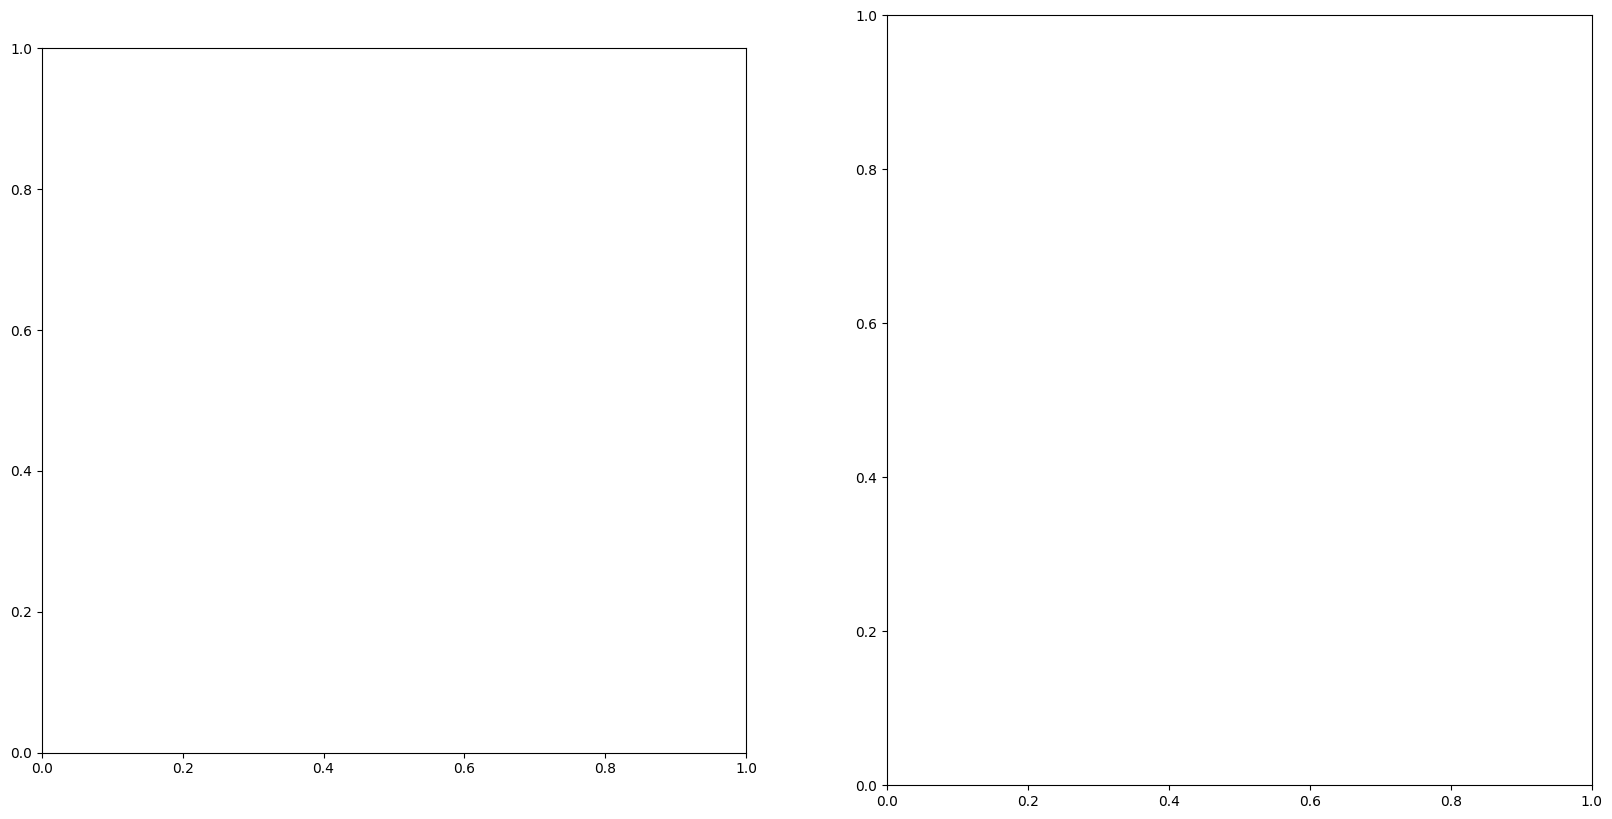

In [49]:
# YOUR CODE HERE

fig, axs = plt.subplots(1, 2, figsize = (20, 10))

gpowiaty.plot(ax = axs[0], column = "Intensywność pierwszego procesu", cmap = "Oranges", legend = True)
gpowiaty.plot(ax = axs[1], column = "Intensywność drugiego procesu", cmap = "Oranges", legend = True)
p1.plot(ax = axs[0], markersize = 6, alpha = 0.5)
p2.plot(ax = axs[1], markersize = 6, alpha = 0.5)



#raise NotImplementedError()

### Zadanie 3: Funkcja G (15 pkt)
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [50]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
  # YOUR CODE HERE

    tab = np.zeros((len(points), 2)) #Tworzę tablicę na współrzędne punktów
    
    #Konwersja typu 'geometry' na tablicę współrzędnych
    tab[:,0] = points["geometry"].x
    tab[:,1] = points["geometry"].y
    
    g_tuple = pp.distance_statistics.g(tab, support = intervals) #Obliczam statystykę G na danym procesie punktowym
    g = pd.DataFrame({"D": g_tuple[0], "G": g_tuple[1]}) #Wpisuję dane z tabeli do DataFrame'a

    return(g) #Zwracam DataFrame'a

    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [51]:
# YOUR CODE HERE
#help('pointpats.distance_statistics.g')

gp3 = g_function(p3, 50)
gp4 = g_function(p4, 50)
gp5 = g_function(p5, 50)

gpt3 = g_function_poisson(gp3["D"], 10**(-9))
gpt4 = g_function_poisson(gp4["D"], 10**(-9))
gpt5 = g_function_poisson(gp5["D"], 10**(-9))

#raise NotImplementedError()

NameError: name 'pp' is not defined

#### c) Wizualizacja

NameError: name 'gp3' is not defined

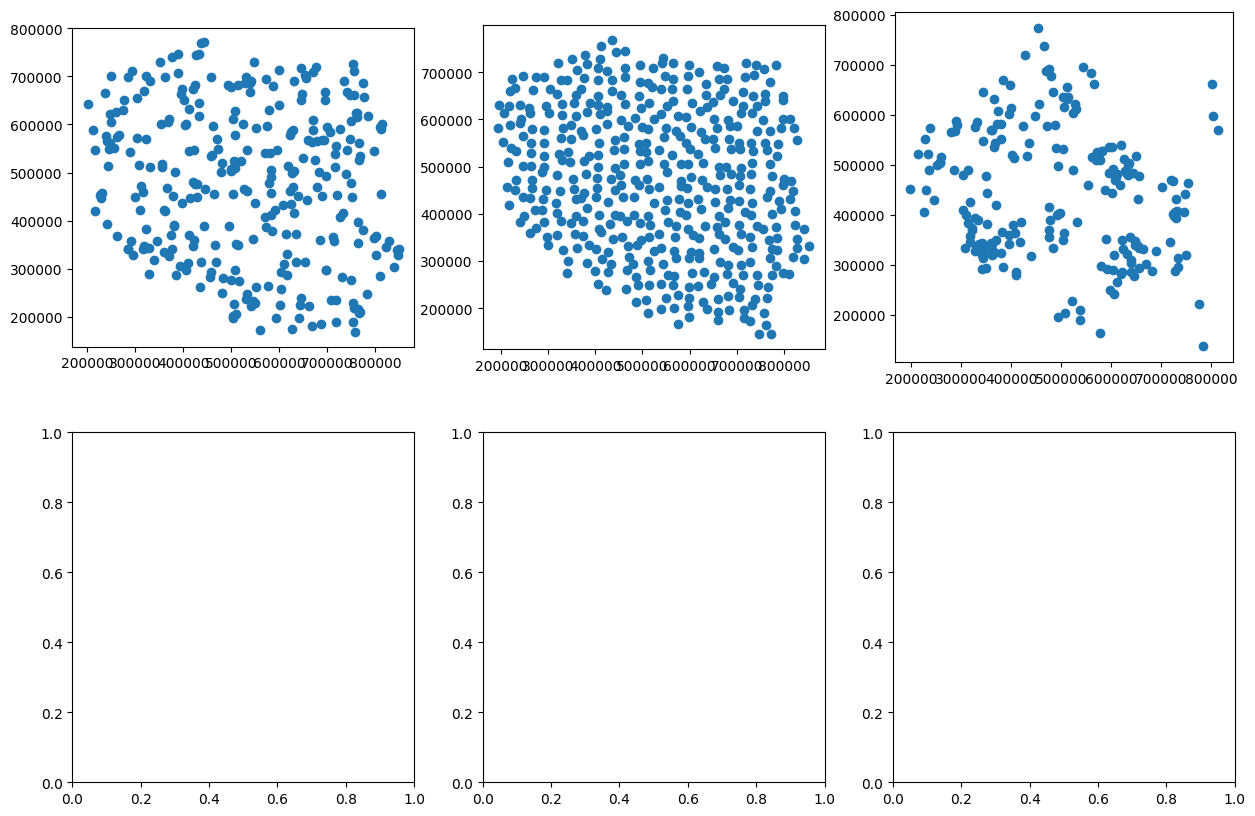

In [52]:
# YOUR CODE HERE

fig,axs = plt.subplots(2, 3, figsize = (15,10))

p3.plot(ax = axs[0,0])
p4.plot(ax = axs[0,1])
p5.plot(ax = axs[0,2])

lab_g = "G_test(x)"
lab_gt = "G_poiss(x)"

axs[1,0].plot(gp3["D"], gp3["G"], color = "blue", label = lab_g)
axs[1,0].plot(gpt3["D"], gpt3["G"], color = "red", label = lab_gt)
axs[1,1].plot(gp4["D"], gp4["G"], color = "blue", label = lab_g)
axs[1,1].plot(gpt4["D"], gpt4["G"], color = "red", label = lab_gt)
axs[1,2].plot(gp5["D"], gp5["G"], color = "blue", label = lab_g)
axs[1,2].plot(gpt5["D"], gpt5["G"], color = "red", label = lab_gt)

labels = ["Proces points_3", "Proces points_4", "Proces points_5", "Funkcja G - Proces jednorodny Poissona", "Funkcja G - Proces regularny", "Funkcja G - Proces klastrowy"]

for j in range(3):
    plt.sca(axs[0,j])
    plt.xticks((200000, 400000, 600000, 800000), ('200 000', '400 000', '600 000', '800 000'))
    for i in range(2):
        axs[i,j].set_title(labels[j+3*i])
        
for i in range(3):
    handles, labels = axs[1,i].get_legend_handles_labels()
    axs[1,i].legend(handles[::-1], labels[::-1])

#raise NotImplementedError()

### Zadanie 4: Funkcja F (15 pkt)

Wykorzystując funkcję `pointpats.distance_statistics.f()` przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla rozkładów punktów z plików points_3.zip, points_4.zip i points_5.zip. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. 

#### a) Przygotowanie funkcji

In [56]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: Polygon
        Obszar, na którym mają zostać wygenerowane punkty procesu testowego.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    # YOUR CODE HERE

    tab = np.zeros((len(points), 2)) #Tworzę tablicę na współrzędne punktów
    
    #Konwersja typu 'geometry' na tablicę współrzędnych
    tab[:,0] = points["geometry"].x
    tab[:,1] = points["geometry"].y
    
    f_tuple = pp.distance_statistics.f(tab, support = intervals) #Obliczam statystykę F na danym procesie punktowym
    f = pd.DataFrame({"D": f_tuple[0], "F": f_tuple[1]}) #Wpisuję dane z tabeli do DataFrame'a

    return(f) #Zwracam DataFrame'a
    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [57]:
# YOUR CODE HERE
#help('pointpats.distance_statistics.f')

polska_poisson = homogeneous_poisson_on_polygon(10**(-9), pol)

fp3 = f_function(p3, 50, polska_poisson)
fp4 = f_function(p4, 50, polska_poisson)
fp5 = f_function(p5, 50, polska_poisson)

fpt3 = f_function_poisson(fp3["D"], 10**(-9))
fpt4 = f_function_poisson(fp4["D"], 10**(-9))
fpt5 = f_function_poisson(fp5["D"], 10**(-9))

#raise NotImplementedError()

NameError: name 'pp' is not defined

#### c) Wizualizacja

NameError: name 'fp3' is not defined

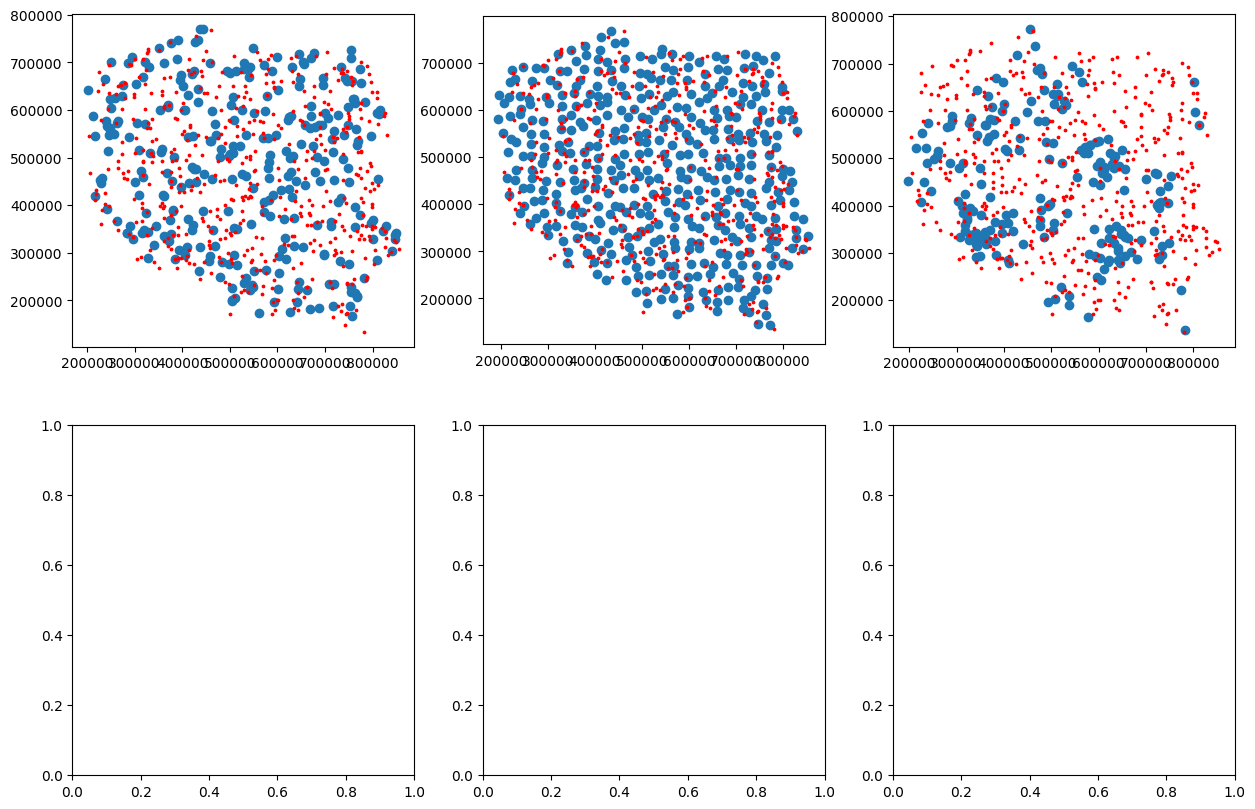

In [58]:
# YOUR CODE HERE

lab_ft = "F_teor(x)"
lab_f = "F_test(x)"
lab_teor = "Rozkł. teor."
lab_test = "Rozkł. test."

fig, axs = plt.subplots(2, 3, figsize = (15,10))

p3.plot(ax = axs[0,0], label = lab_test)
p4.plot(ax = axs[0,1], label = lab_test)
p5.plot(ax = axs[0,2], label = lab_test)

polska_poisson.plot(color = "red", ax = axs[0,0], markersize = 3, label = lab_teor)
polska_poisson.plot(color = "red", ax = axs[0,1], markersize = 3, label = lab_teor)
polska_poisson.plot(color = "red", ax = axs[0,2], markersize = 3, label = lab_teor)

axs[1,0].plot(fp3["D"], fp3["F"], color = "blue", label = lab_f)
axs[1,0].plot(fpt3["D"], fpt3["F"], color = "red", label = lab_ft)
axs[1,1].plot(fp4["D"], fp4["F"], color = "blue", label = lab_f)
axs[1,1].plot(fpt4["D"], fpt4["F"], color = "red", label = lab_ft)
axs[1,2].plot(fp5["D"], fp5["F"], color = "blue", label = lab_f)
axs[1,2].plot(fpt5["D"], fpt5["F"], color = "red", label = lab_ft)

labels = ["Proces points_3", "Proces points_4", "Proces points_5", "Funkcja F - Proces jednorodny Poissona", "Funkcja F - Proces regularny", "Funkcja F - Proces klastrowy"]



#raise NotImplementedError()